# 판다스(pandas)심화

## 데이터프레임 정렬

In [78]:
import numpy as np
import pandas as pd
print("DataFrame: ")
data = {
    'col1':[2,1,9,8,7,4],
    'col2':['A','A','B',np.nan,'D','C'],
    'col3':[0,1,9,4,2,3]
}
index = [1,3,2,5,0,4]
df = pd.DataFrame(data,index)
df

DataFrame: 


,col1,col2,col3
1,2,A,0
3,1,A,1
2,9,B,9
5,8,NaN,4
0,7,D,2
4,4,C,3


In [10]:
# index axis=0(행)을 축으로, 내림차순
df = df.sort_index(axis=0, ascending=False)
df

,col3,col2,col1
5,4,NaN,8
4,3,C,4
3,1,A,1
2,9,B,9
1,0,A,2
0,2,D,7


In [9]:
# index axis=1(열)을 축으로, 내림차순
df = df.sort_index(axis=1, ascending=False)
df

,col3,col2,col1
5,4,NaN,8
4,3,C,4
3,1,A,1
2,9,B,9
1,0,A,2
0,2,D,7


In [12]:
# sort_value1
sorted_df1 = df.sort_values('col1',ascending=True)
sorted_df1

,col3,col2,col1
3,1,A,1
1,0,A,2
4,3,C,4
0,2,D,7
5,4,NaN,8
2,9,B,9


In [13]:
# sort_value 2
sorted_df2 = df.sort_values(['col2','col1'],ascending=[True,False])
sorted_df2

,col3,col2,col1
1,0,A,2
3,1,A,1
2,9,B,9
4,3,C,4
0,2,D,7
5,4,NaN,8


In [44]:
# 데이터 프레임의 index와 columns
import numpy as np
import pandas as ol
data = {
    'korea' : [50,60,70,30],
    'math' : [30,np.nan,40,20]

}
index = ['a', 'b', 'c','d']
df = pd.DataFrame(data,index=index)
print(df.index)
print (df.columns)
df

Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['korea', 'math'], dtype='object')


,korea,math
a,50,30.0
b,60,NaN
c,70,40.0
d,30,20.0


In [58]:
# count() 함수
print(df.count(axis=0)) # axis = 0 기본값(생략가능)
print(df.count(axis=1))

korea    4
math     4
dtype: int64
a    2
b    2
c    2
d    2
dtype: int64


In [59]:
# max(), min(), sum(), mean()
print(df.max())
print(df.max(axis=1))
print(df.min())
print(df.min(axis=1))
print(df.sum())
print(df.sum(axis=1))
print(df.mean())
print(df.mean(axis=1))
print(df.mean(axis=1,skipna=False)) # NaN값 보이게 하기

korea    70.0
math     40.0
dtype: float64
a    50.0
b    60.0
c    70.0
d    30.0
dtype: float64
korea    30.0
math     20.0
dtype: float64
a    30.0
b    30.0
c    40.0
d    20.0
dtype: float64
korea    210.0
math     120.0
dtype: float64
a     80.0
b     90.0
c    110.0
d     50.0
dtype: float64
korea    52.5
math     30.0
dtype: float64
a    40.0
b    45.0
c    55.0
d    25.0
dtype: float64
a    40.0
b    45.0
c    55.0
d    25.0
dtype: float64


In [61]:
# 결측값 대체 fillna
avg = df['math'].mean()
df['math']=df['math'].fillna(avg)
df

,korea,math
a,50,30.0
b,60,30.0
c,70,40.0
d,30,20.0


## 그룹으로 묶기 (groupby) 

In [4]:
import numpy as np
import pandas as pd
df = pd.DataFrame({
    'key' : ['A','B','C','A','B','C'],
    'data1' : [1, 2, 3, 1, 2, 3],
    'data2' : [4, 4, 6, 0, 6, 1],
    # 'data3' : ['안녕','a','b','하세요','pple','3']
})
print("DataFrame:")
df

DataFrame:


,key,data1,data2
0,A,1,4
1,B,2,4
2,C,3,6
3,A,1,0
4,B,2,6
5,C,3,1


In [5]:
df.groupby('key').sum()

,data1,data2
key,,
A,2,4
B,4,10
C,6,7


In [6]:
df.groupby(['key','data1']).sum() # .reset_index()

,,data2
key,data1,
A,1,4
B,2,10
C,3,7


In [7]:
df.groupby('key').aggregate(['min','median','max'])

data1            data2           
      min median max   min median max
key                                  
A       1    1.0   1     0    2.0   4
B       2    2.0   2     4    5.0   6
C       3    3.0   3     1    3.5   6

In [8]:
df.groupby('key').aggregate({'data1':'max','data2':'sum'})

,data1,data2
key,,
A,1,4
B,2,10
C,3,7


In [9]:
# filter 메서드
t = list(range(1,11))
result = []
def is_even(x):
    return True if x%2==0 else False

for i in t:
    if is_even(i):
        result.append(i)
print(result)

[2, 4, 6, 8, 10]


In [12]:
df.groupby('key').mean()

,data1,data2
key,,
A,1.0,2.0
B,2.0,5.0
C,3.0,3.5


In [14]:
def filter_mean(x):
    return x['data2'].mean() > 3
df.groupby('key').filter(filter_mean)

,key,data1,data2
1,B,2,4
2,C,3,6
4,B,2,6
5,C,3,1


In [37]:
df1 = df.groupby('key').get_group('A')
df2 = df.groupby('key').get_group('B')
df3 = df.groupby('key').get_group('C')
df4 = pd.concat([df1,df3],axis=1)
df5 = pd.concat([df2,df3],axis=1)
# means = df2['data2'.astype(int).mean1
# df5.fillna(method='ffill')
# df5.fill()
# df5.bfill()

## 피봇과 피봇테이블

In [58]:
import pandas as pd
pd
df = pd.DataFrame([
    ['20210901','A',1],
    ['20210901','B',10],
    ['20210901','C',100],
    ['20210902','A',2],
    ['20210902','B',20],
    ['20210902','C',200],
    ['20210903','A',3],
    ['20210903','B',30],
    ['20210903','C',300],
], columns=['date','type','volume'])
df

,date,type,volume
0,20210901,A,1
1,20210901,B,10
2,20210901,C,100
3,20210902,A,2
4,20210902,B,20
5,20210902,C,200
6,20210903,A,3
7,20210903,B,30
8,20210903,C,300


In [59]:
pivot1 = df.pivot(index='date',columns='type',values='volume')
pivot1

type,A,B,C
date,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


In [60]:
pivot1.columns = pivot1.columns.values
pivot1

,A,B,C
date,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


In [62]:
pivot1.reset_index(level=0,inplace=True)
pivot1

,date,A,B,C
0,20210901,1,10,100
1,20210902,2,20,200
2,20210903,3,30,300


In [63]:
pivot1 = pivot1.set_index('date')
pivot1

,A,B,C
date,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


<Axes: ylabel='date'>

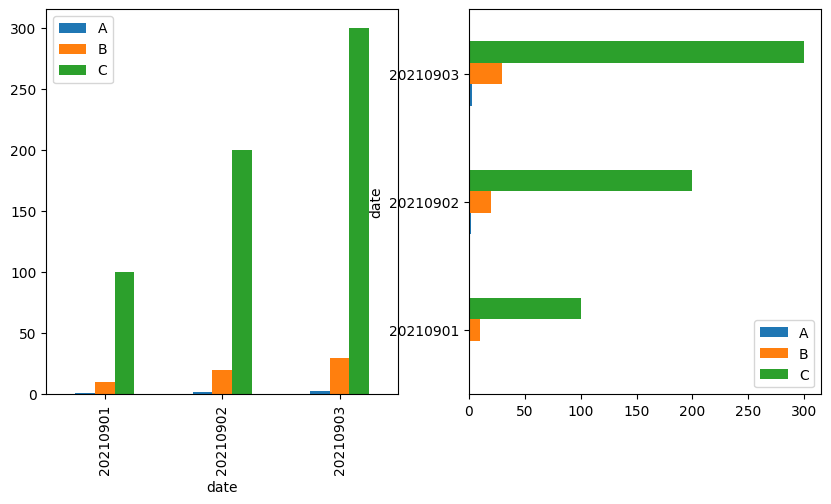

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(10,5))
pivot1.plot(kind='bar',ax=ax[0])
pivot1.plot(kind='barh',ax=ax[1])

In [69]:
import numpy as np
import pandas as pd
df=pd.DataFrame({
    '지역':['안동','안동','안동','경기',
         '경기','부산','서울','안동'],
    '요일':['월','월','수','월','화',
          '월','목','금'],
    '강수확률':[80,70,90,10,20,30,40,80],
    '강수량':[80,50,100,200,200,100,50,1000]})
df

,지역,요일,강수확률,강수량
0,안동,월,80,80
1,안동,월,70,50
2,안동,수,90,100
3,경기,월,10,200
4,경기,화,20,200
5,부산,월,30,100
6,서울,목,40,50
7,안동,금,80,1000


In [76]:
pd.pivot_table(df, index='요일',
              columns='지역',
              aggfunc='max').fillna(' ')
# aggfunc='sum' 같은 셀의 합계
# aggfunc='mean' 같은 셀의 평균

강수량                       강수확률                  
지역     경기     부산    서울      안동    경기    부산    서울    안동
요일                                                    
금                       1000.0                    80.0
목                 50.0                      40.0      
수                        100.0                    90.0
월   200.0  100.0          80.0  10.0  30.0        80.0
화   200.0                       20.0

In [77]:
data = {
    '도시':['서울','부산','서울','부산','대구','대구','대구'],
    '연도':[2022,2022,2023,2023,2022,2023,2023],
    '판매량':[100,80,120,90,70,60,0]
}
df= pd.DataFrame(data)
pivot = df.pivot_table(index='도시',columns='연도',values='판매량',aggfunc='min',fill_value=0)
pivot

연도,2022,2023
도시,,
대구,70,0
부산,80,90
서울,100,120


# 데이터 시각화 (Matplotlib) 

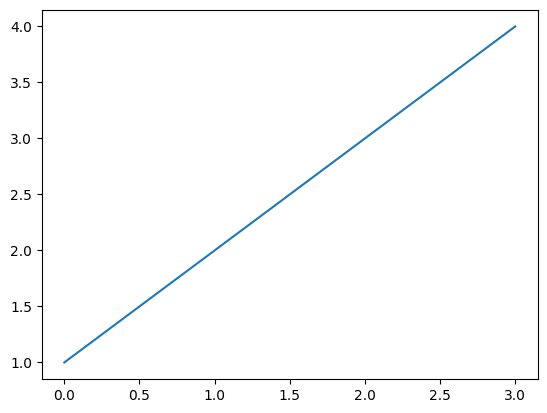

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.show()

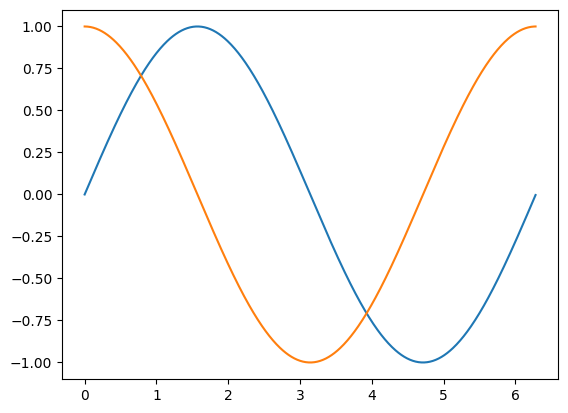

In [2]:
import numpy as np
x = np.arange(0,2*np.pi,0.01)
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))
plt.show()

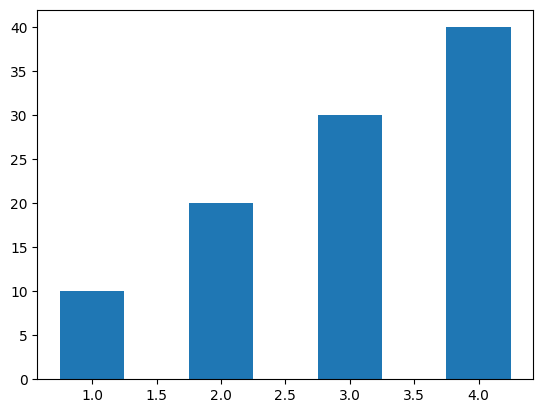

In [4]:
plt.bar([1,2,3,4],[10,20,30,40],width=0.5)
plt.show()

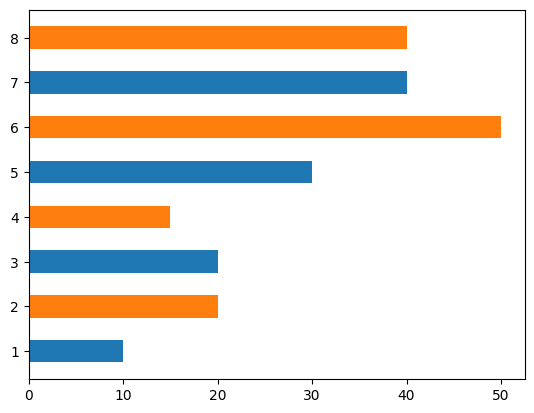

In [7]:
plt.barh(range(1,8,2),[10,20,30,40],height=0.5)
plt.barh(range(2,9,2),[20,15,50,40],height=0.5)
plt.show()

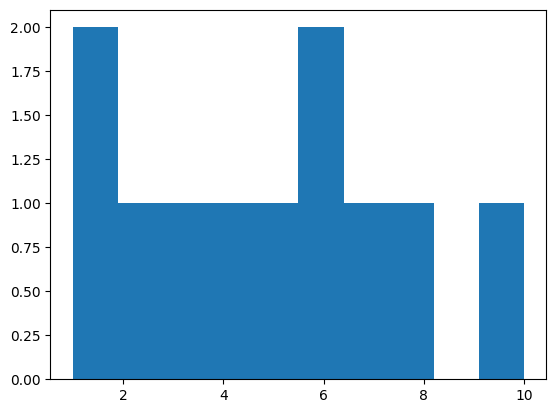

In [12]:
plt.hist([1,1,2,3,4,5,6,6,7,8,10],bins=10) #bins 안 적어주면 기본값이 10
plt.show()

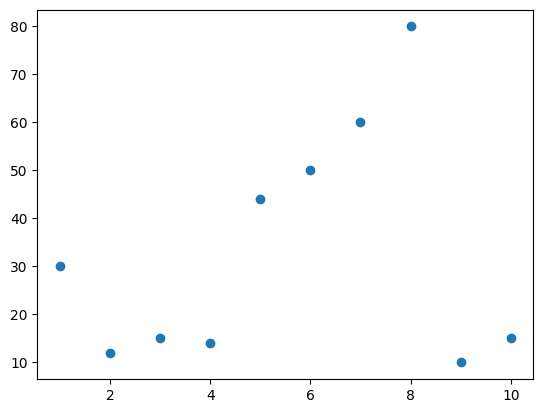

In [13]:
plt.scatter(range(1,11),[30,12,15,14,44,50,60,80,10,15])
plt.show()

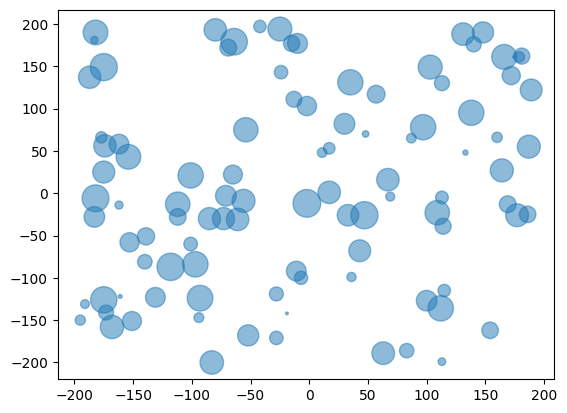

In [19]:
x = np.random.randint(-200,200,100)
y = np.random.randint(-200,200,100)
z = np.random.randint(0,200,100)
plt.scatter(x,y,s=z*2,alpha=0.5)
plt.show()

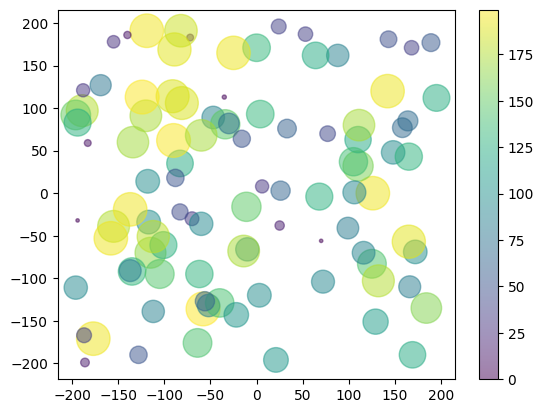

In [24]:
x = np.random.randint(-200,200,100)
y = np.random.randint(-200,200,100)
z = np.random.randint(0,200,100)
#color = np.random.randint(0,100,100)
plt.scatter(x,y,s=z*3,c=z,alpha=0.5)
plt.colorbar()
plt.show()

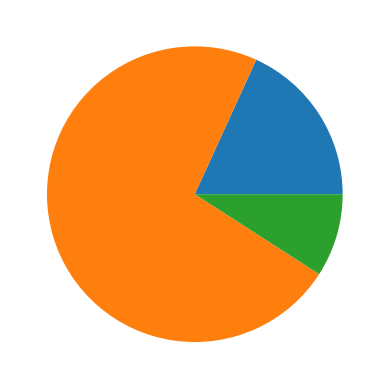

In [26]:
plt.pie([20,80,10])
plt.show()

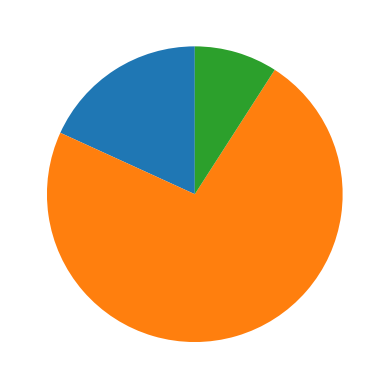

In [27]:
plt.pie([20,80,10],startangle=90)
plt.show()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


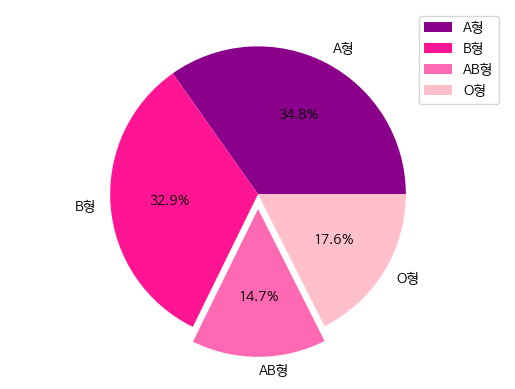

In [31]:
import matplotlib.font_manager as fm
from matplotlib import rc
path = 'C:\\Windows\\Fonts\\Hancom Gothic Bold.ttf'
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)

size = [2441, 2312, 1031,1233]
label = ['A형','B형','AB형','O형']
color = ['darkmagenta','deeppink','hotpink','pink']
plt.axis('equal')
plt.pie(size, labels = label, autopct = '%.1f%%', explode = (0,0,0.1,0), colors = color)
plt.legend()
plt.show()